### Notebook provides the snippet of code for K-Mean test & train

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
pd.set_option('display.float_format','{:,.1f}'.format)

# Create a function to provide data exploratory summary
def df_ex(df,head_size = 5, show_info = True):
    '''print data frame exploratory summary statistics to screen'''
    display(df.shape)
    display(df.head(head_size))
    if show_info:
        display(df.info())

In [3]:
#import the d
boston_full = pd.read_csv("/Users/andrewalvarez/Library/CloudStorage/Dropbox/Mac (2)/Desktop/Python for Analytics/2. Datasets/Data0129/BostonHousingData.csv")

In [4]:
boston_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,6.9,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.1,11.4,21.2
75%,3.7,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,38.0,50.0


In [5]:
df_ex(boston_full)

(506, 13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.0,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,5.0,24.0
1,0.0,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,9.1,21.6
2,0.0,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242,17.8,4.0,34.7
3,0.0,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,2.9,33.4
4,0.1,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,5.3,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None

In [6]:
boston_full.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.0,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,5.0,24.0
1,0.0,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,9.1,21.6
2,0.0,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242,17.8,4.0,34.7
3,0.0,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,2.9,33.4
4,0.1,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,5.3,36.2


In [7]:
boston_target = boston_full["MEDV"]

In [8]:
boston = boston_full.drop(['MEDV'], axis=1).reset_index(drop = True)

In [9]:
#This is the test train split. boston is x, and boston_target is y
#I will have to decine y before this as "boston_target"
X_train, X_test, y_train, y_test = train_test_split(boston, boston_target, test_size=0.3, random_state=0)

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.

The standard scaler function has a formula:

x: Element  
u: Mean  
s: Standard Deviation

z = (x - u) / s

Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.

This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

When normalizing the test set, one should apply the normalization parameters previously obtained from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would produce wrong predictions.

In [10]:
scaler = StandardScaler() #defining the scaler variable. Scaler is like an action taking place on the data to normalize it
scaler.fit(X_train) #Which is why it's similar to running a regression syntactically. We're fitting the standard scalar to the data.
X_train_scaled = scaler.transform(X_train) #Why do we transform these values?
X_test_scaled = scaler.transform(X_test)

You can see the mean and standard deviation using the built methods for the StandardScaler object

In [11]:
# Mean
print(scaler.mean_)

# Standard Deviation
print(scaler.scale_) 

[3.35828432e+00 1.18093220e+01 1.10787571e+01 6.49717514e-02
 5.56098305e-01 6.30842655e+00 6.89940678e+01 3.76245876e+00
 9.35310734e+00 4.01782486e+02 1.84734463e+01 1.24406497e+01]
[8.34141658e+00 2.36196246e+01 6.98393565e+00 2.46476009e-01
 1.15437239e-01 7.01016354e-01 2.79987983e+01 2.06473886e+00
 8.65974217e+00 1.70351284e+02 2.22166426e+00 7.06848020e+00]


Generate the K-means solution. 

Extract 2-10 k-means clusters using the variable set. Present the Variance-Accounted-For (VAF or R-square). Remember: the local optima problem is big for all the clustering and mixture models. So remember to run them from at least 50-100 random starts.

Use the training set only.
Always set.seed() for reproducibility of the code.
Run a for loop through different K values. At each iteration, save the necessary information you might need, such as VAF, cluster sizes, and cluster centroids.

In [12]:
#creating a dataframe for our results from the k - means clusters
k_value_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf'])
sum_sq_distance = []

kmeans_model
 * n_clusters is the iteration
 * n_init is the initeria I believe. Should it be set to k-means++
 * max_iter is set to run 300 times
 * tol is the tolerance that has to do with convergence I believe 
 * verbose is merely for messaging 

In [14]:
for k in range(2,11): #why do we want to discard the first 3 clusters? or is this just a range of 10?
    kmeans_model = KMeans(n_clusters=k, n_init=200, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_train_scaled)
    kmeans_model.fit_predict(X_train_scaled) #fitting the kmeans model to our scaled x_train data
    sum_sq_distance.append(kmeans_model.inertia_)

    centroids = kmeans_model.cluster_centers_ #variable for our centroids
    labels = kmeans_model.labels_ #variable for our labels. Each instance is assigned to one of the five clusters and is given an index of the cluster it gets assigned to.
    cluster_sizes = np.bincount(labels) #Count number of occurrences of each value in array of non-negative ints
    
    centroids_dataframe = pd.DataFrame(data=centroids) #converting our centroids to a dataframe
    centroids_matrix = centroids_dataframe.values #converting our centroids to a matrix
    
    shap = (len(X_train_scaled),k) #creating a variable "shap," a tuple that is the length of both x_test_scaled and k
    cluster_matrix = np.zeros(shap) #creating an array of zeroes with the shape of the tuple defined in the variable "shap" and assigning it to "cluster_matrix"

    for i in range(k): #Using a for loop that iterates over the range of k (the number of clusters). Inside the loop, cluster_matrix is being updated.    
        cluster_matrix[kmeans_model.labels_ == i,i]=1.0 #the updating: using numpy's boolean indexing to set all the elements in cluster_matrix that have the same label as the current iteration to 1.0.

    predicted_data= np.dot(cluster_matrix,centroids_matrix) #dot product of the matrix to the centroids
    shap2 = (len(X_train_scaled)*k,1) #I don't know what this is for to be honest
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_train_scaled.ravel())[0,1])**2
    #The coefficient of variance accounted for, which is the square of the correlation coefficient between predicted_data and X_test_scale
    #.ravel() is flattening the array to a 1-D array from whatever n-dimensional array they started with
    
    k_value_results.at[k,'k'] = k
    k_value_results.at[k,'labels'] = labels
    k_value_results.at[k,'centroids'] = centroids
    k_value_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_results.at[k,'vaf'] = vaf

# Explanation 

I think we're creating a dataframe using dummy variables (0s and 1s--matrix). Then I think we're using the dot product (multiplying and adding) to the centroids of the clusters of the Boston data, or do we have betas at this point? This matrix is essentially X different models that are averages (k-mean clustered) of the betas? This gives us the centroids of each variable. So, multiplying these centroids by the dummy variable combinations will give us the "importance" (the beta sums if this is similar to the conjoint analysis)

Perform a Scree test to choose appropriate number of k-means clusters. In other words, plot the VAFs you saved from the last step. Choose a K, based on the “elbow rule”.

If the "elbow" is smooth and present a couple of reasonable candidates of K, you may consider other factors, such as the business context, interpretability, and ease of interpretation. There’s no right answer, as long as you justify your decision.

Show the scree plot.

In [15]:
k_value_results

,k,labels,centroids,cluster_sizes,vaf
2,2,"[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[[0.7230624580488351, -0.49997924404938904, 1....","[119, 235]",0.4
3,3,"[1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, ...","[[-0.34972010732637765, -0.3550650527687201, -...","[149, 116, 89]",0.5
4,4,"[1, 3, 1, 0, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, ...","[[-0.39434264129505614, 1.397345687765975, -0....","[78, 109, 23, 144]",0.6
5,5,"[4, 1, 4, 3, 4, 4, 1, 4, 2, 1, 1, 1, 3, 1, 1, ...","[[-0.18726758414624972, -0.2422716540992818, 0...","[23, 126, 84, 52, 69]",0.6
6,6,"[3, 0, 3, 2, 3, 0, 0, 0, 1, 0, 5, 5, 2, 0, 0, ...","[[-0.3685267849619783, -0.33696110038223154, -...","[117, 84, 54, 37, 23, 39]",0.7
7,7,"[2, 3, 2, 0, 2, 3, 3, 3, 1, 3, 5, 5, 0, 3, 3, ...","[[-0.39619727821463924, 2.013624230519525, -1....","[54, 78, 37, 117, 23, 39, 6]",0.7
8,8,"[6, 5, 6, 2, 6, 0, 5, 0, 1, 0, 5, 4, 5, 5, 5, ...","[[-0.35282417049568976, -0.4483802020437534, -...","[64, 78, 40, 23, 35, 71, 37, 6]",0.7
9,9,"[8, 1, 8, 5, 8, 2, 1, 2, 0, 2, 1, 3, 1, 1, 1, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 69, 65, 35, 23, 40, 6, 16, 22]",0.7
10,10,"[2, 3, 2, 6, 2, 1, 3, 1, 0, 1, 3, 4, 3, 3, 3, ...","[[0.7231761467377704, -0.4999792440493886, 1.0...","[78, 65, 22, 69, 36, 16, 40, 6, 16, 6]",0.8


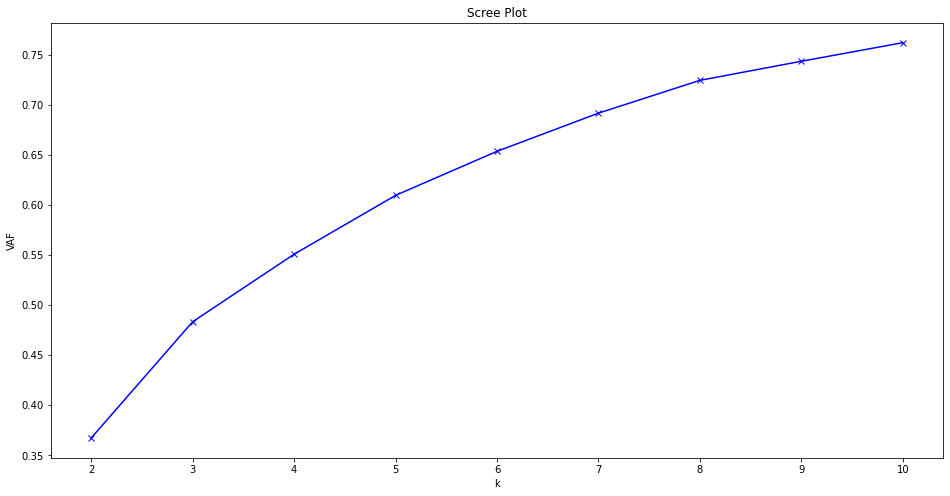

In [16]:
plt.figure(figsize=(16,8))
plt.plot(k_value_results['k'], k_value_results['vaf'], 'bx-')
plt.xlabel('k')
plt.ylabel('VAF')
plt.title('Scree Plot')
plt.show()

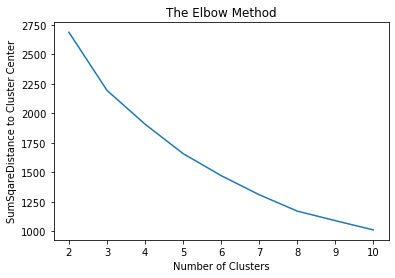

In [17]:
plt.plot(range(2, 11), sum_sq_distance)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SumSqareDistance to Cluster Center')
plt.show()

Choose 1 K-means solution (the best K from the last step) to retain from the many solutions that you have generated

* a. Use the criteria of VAF.
* b. Interpretability of the segments
* c. Doing well in Test. For the Test, use the centers (means) generated from the training set k-means solution (from step 3), as the starting point for performing k-means in the test set. Use VAF and relative cluster sizes as measures of stability.

Run Kmeans  on the test data set with the centers of the clusters from the train data solution as a starting point. Show the VAFs, cluster sizes, and centroids of both the training set and test set at the best K. 

Compare and interpret. A good selection of K should be at the “elbow” and presents a decent level of stability (VAF, centroids, and cluster sizes should be similar/unchanged between train and test). Does your model demonstrate these qualities?

Note from above: I am testing this for both K=3 and K=4 to compare.

In [18]:
#creating a dataframe for our results from the k - means clusters results for the test
k_value_test_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf'])

In [19]:
for k in [3,4]:
    initial_centroids = k_value_results.at[k,'centroids'] #using the chosen centroids from the test set
    kmeans_model_test = KMeans(n_clusters=k, init=initial_centroids, n_init=1, max_iter=300, tol=0.0001, verbose=0,random_state = 13511).fit(X_test_scaled) #initializing the kmeans algorithm on the test data
    kmeans_model_test.fit_predict(X_test_scaled) #running the prediction

    centroids = kmeans_model_test.cluster_centers_ #new centroids
    labels = kmeans_model_test.labels_ #Forget what labels returns
    cluster_sizes = np.bincount(labels) # size of each "bin" or cluster
    
    centroids_dataframe = pd.DataFrame(data=centroids) # creating a dataframe of the centroids
    centroids_matrix = centroids_dataframe.values # creating a matrix from the dataframe
    
    #14 through #23 I think calculates the variance accounted for
    shap = (len(X_test_scaled),k) #creating a variable "shap," a tuple that is the length of both x_test_scaled and k
    cluster_matrix = np.zeros(shap) #creating an array of zeroes with the shape of the tuple defined in the variable "shap" and assigning it to "cluster_matrix"

    for i in range(k): #Using a for loop that iterates over the range of k (the number of clusters). Inside the loop, cluster_matrix is being updated.    
        cluster_matrix[kmeans_model_test.labels_ == i,i]=1.0 #the updating: using numpy's boolean indexing to set all the elements in cluster_matrix that have the same label as the current iteration to 1.0.

    predicted_data= np.dot(cluster_matrix,centroids_matrix) #using numpy's dot product function to calculate the dot product of the cluster_matrix and centroids_matrix. 
    shap2 = (len(X_test_scaled)*k,1) #A tuple of the length of X_test_scaled multiplied by k, and 1. Why are we doing this?
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_test_scaled.ravel())[0,1])**2 
    #The coefficient of variance accounted for, which is the square of the correlation coefficient between predicted_data and X_test_scale
    #.ravel() is flattening the array to a 1-D array from whatever n-dimensional array they started with
    
    k_value_test_results.at[k,'k'] = k
    k_value_test_results.at[k,'labels'] = labels
    k_value_test_results.at[k,'centroids'] = centroids
    k_value_test_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_test_results.at[k,'vaf'] = vaf
    
    print('\nFOR K =',k) 
    print('\nCenters for the test data clusters are: ') 
    print(centroids.T)
    print('\nCenters for the original clusters are: ') 
    print(initial_centroids.T)
    print("\nThe test cluster proportions are", np.bincount(labels)/len(labels))
    print("\nThe original cluster proportions are", np.bincount(k_value_results.at[k,'labels'])/len(k_value_results.at[k,'labels']))
    print('\nVAF for the test data is:') 
    print(vaf)
    print('\nVAF for the original data is:') 
    print(k_value_results.at[k,'vaf'])


FOR K = 3

Centers for the test data clusters are: 
[[-0.36304869  1.09505486 -0.3919585 ]
 [-0.40834046 -0.49997924  1.70314794]
 [-0.27240246  1.06621042 -1.01251644]
 [ 0.00331765  0.15039624  0.03692985]
 [-0.36742125  1.07332518 -1.1414746 ]
 [-0.00406211 -0.63394548  0.52587578]
 [-0.12310169  0.79062481 -1.36889451]
 [ 0.132177   -0.91307074  1.58075077]
 [-0.53914963  1.37322687 -0.54972939]
 [-0.47135332  1.37143479 -0.4520348 ]
 [-0.14262613  0.53279721 -0.7165641 ]
 [-0.21414448  1.07848188 -0.79129348]]

Centers for the original clusters are: 
[[-0.34972011  0.75152267 -0.39402623]
 [-0.35506505 -0.49997924  1.24609309]
 [-0.31602227  1.127346   -0.94027884]
 [ 0.09038028 -0.01877231 -0.12684353]
 [-0.23090774  1.13164915 -1.08838257]
 [ 0.06718379 -0.43803986  0.45845212]
 [ 0.18634163  0.78722225 -1.33800768]
 [-0.15006709 -0.82881073  1.33148362]
 [-0.56235922  1.18367738 -0.60129272]
 [-0.61671184  1.28796898 -0.64622851]
 [-0.1865205   0.60873993 -0.48114918]
 [-0.132

np.corrcoef(predicted_data.ravel(), X_test_scaled.ravel()) calculates the correlation coefficient between the predicted data and the original data. The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of a linear relationship between two variables. A correlation coefficient of 1 means there is a perfect positive linear relationship, -1 means there is a perfect negative linear relationship, and 0 means there is no linear relationship.

The [0,1] is used to extract the correlation coefficient value from the correlation matrix that np.corrcoef() returns. The correlation matrix is a square matrix where the diagonal elements are 1 (since each variable is perfectly correlated with itself), and the upper and lower triangle elements represent the correlation between two variables.

In this case, the [0,1] means that it's returning the correlation coefficient between predicted_data and X_test_scaled, which is the element in the first row and second column of the matrix.

Finally, the square of this value is being calculated, which is the coefficient of variation of account for (VAF), which gives you a measure of how well the model has been able to reconstruct the original data from the clustered data.